In [1]:
%pylab inline

import SeaGlider_LG_v01 as slg
from cmocean import cm as cmo
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


## Import the data 

The SeaGlider package takes the directory that contains all the netCDF files. The input string can also contain regular expression syntax as `glob` is used. Once the object has been imported you should be able to access all the variables that use `sg_data_point` as a dimension. This includes temperature, salinity, oxygen and a bunch of the ENG variables (press `TAB` after fullstop for autocomplete of all the variables — this will only work in *Jupyter notebook* or *IPython*)

In [2]:
np.ndarray([0]).dtype == 'float'

True

In [3]:
reload(slg)

path_to_SG_data_dir = './sg542_data/'  # change this to the relevant directory
sg542 = slg.SeaGlider(path_to_SG_data_dir,
                      ref_file_name='./sg542_data/p5420100.nc')

# Working with a variable

The data is automatically interpolated to 1000m using 1m bins. The data is loaded and interpolated dynamically when a variable is called so it might take a while the first time. 

## Plotting
Simply call a variable (as below) and then plot section. `cmap` and `vlim` are optional arguments as shown in the second plot. The returned object is an axes object and all related methods can be used on these axes (as shown).

./sg542_data/p5420211.nc doesn't contain temperature or has no data
./sg542_data/p5420212.nc doesn't contain temperature or has no data
./sg542_data/p5420213.nc doesn't contain temperature or has no data
./sg542_data/p5420214.nc doesn't contain temperature or has no data
./sg542_data/p5420215.nc doesn't contain temperature or has no data


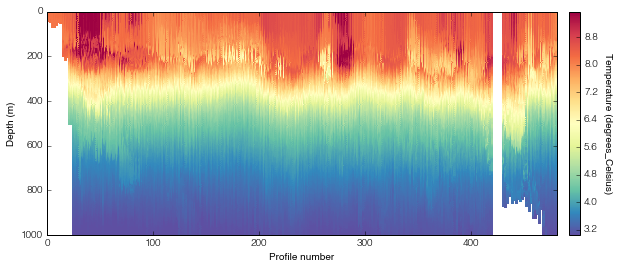

In [4]:
sg542.temperature.plot_section()

./sg542_data/p5420211.nc doesn't contain eng_wlbb2fl_FL1sig or has no data


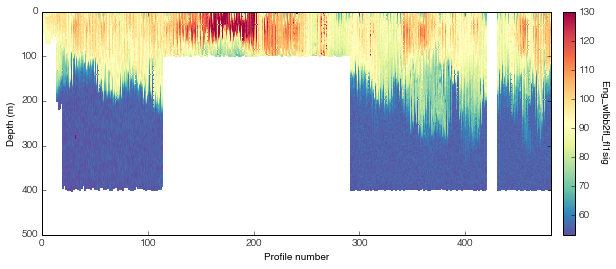

In [5]:
# ax1 = sg542.temperature.plot_section(cmap=cm.Spectral_r, vlim=[8, 10])
# ax1.set_ylim(80, 0)
ax2 = sg542.eng_wlbb2fl_FL1sig.plot_section(cmap=cm.Spectral_r)
ax2.set_ylim(500, 0)
plt.show()

## Accessing Data

You can also access the interpolated data using `SeaGlider_object.variable_name.data`, which returns a pandas.DataFrame, with `dims[depth, dive]`, where dives are split into up and down with whole numbers being down and `.5` being down

In [7]:
sg542.salinity.data.head(6)  # head is a pd.DataFrame function that shows the first n entries

dives,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,...,237.0,237.5,238.0,238.5,239.0,239.5,240.0,240.5,241.0,241.5
depth,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.278292,NaN,34.241515,NaN,34.239923,NaN,34.249004,NaN,34.224676,NaN,...,34.314425,NaN,34.312859,NaN,34.310537,NaN,34.312879,NaN,34.300455,NaN
2,34.247742,NaN,34.242541,NaN,34.243645,NaN,34.241497,NaN,34.235692,NaN,...,34.315071,NaN,34.310907,NaN,34.309785,NaN,34.316471,NaN,34.300310,NaN
3,34.244991,NaN,34.242251,NaN,34.246455,NaN,34.240948,NaN,34.241013,NaN,...,34.314414,NaN,34.311275,NaN,34.309415,NaN,34.316467,NaN,34.300065,NaN
4,34.250656,34.243578,34.240204,34.242525,34.246874,34.239835,34.239909,34.243233,34.240988,NaN,...,34.314799,34.314645,34.310164,34.315574,34.309899,34.308093,34.316956,34.309950,34.300516,34.31548
5,34.240319,34.244234,34.239572,34.243892,34.246280,34.241849,34.244865,34.244012,34.241308,34.245072,...,34.314615,34.316585,34.310012,34.316292,34.309729,34.308586,34.315769,34.310811,34.301057,34.31409


In [7]:
sg542.salinity.values  # shows masked_array which can be used for pcolormesh

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [34.278291947800014 -- 34.241515250897734 ..., -- 34.299172027262884 --]
 [34.247742054850164 -- 34.242540674503346 ..., -- 34.299300298390534 --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [False  True False ...,  True False  True]
 [False  True False ...,  True False  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

## Viewing unprocessed dive data

Uninterpolated data can also be access for individual dives by indexing the variable directly as shown below. 
The index represents the file number from the list `SeaGlider_object.files`.
The returned object is a pandas.Series with depth as the index. 

In [8]:
print sg542.files[38:43]

['./SeaGlider/sg_data/p5420039.nc' './SeaGlider/sg_data/p5420040.nc'
 './SeaGlider/sg_data/p5420041.nc' './SeaGlider/sg_data/p5420042.nc'
 './SeaGlider/sg_data/p5420043.nc']


In [9]:
print sg542.eng_head[40].tail(15)  # tail shows last 10

Importing file: ./SeaGlider/sg_data/p5420041.nc
12.181917    46.9
11.273291    56.5
9.795517     43.9
8.946790     43.5
8.128015     46.9
7.299252     43.5
6.430545     44.3
5.491938     48.1
4.643193     42.7
3.814416     50.2
2.935709     58.0
1.537757     50.7
0.808822     57.8
0.449346     74.1
0.199709     70.2
Name: eng_head, dtype: float64


In [18]:
# Principle used to import the variables "on the fly"

# attributes = {}
# sg_data = {}
# gc_data = {}
# for key in nc.variables:
    
#     dims = nc[key].dimensions
#     if u'sg_data_point' in dims:
#         sg_data[key] = nc.variables[key][:]
#     elif u'gc_event' in dims:
#         gc_data[key] = nc.variables[key][:]
#     elif dims:
#         if 'string' in dims[0]:
#             s = nc.variables[key][:]
#             n = '|S' + dims[0].split('_')[1]
#             s = ''.join(nc.variables[key][:]).split(',')
#             s = s[0] if len(s) == 1 else s
#         else:
#             s = nc.variables[key][:]
#         try:
#             s = np.array(s).astype(float)
#         except:
#             s = np.array(s)
#         attributes[key] = s